In [5]:
import sys
print("Python version:", sys.version)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = 'svg' # Makes the images look nice

from qiskit import(
  QuantumCircuit,
  QuantumRegister, ClassicalRegister,
  execute,
  Aer)
from qiskit.visualization import plot_histogram
from qiskit import __qiskit_version__
print("qiskit version:", __qiskit_version__)

Python version: 3.8.5 (default, Jul 27 2020, 08:42:51) 
[GCC 10.1.0]
qiskit version: {'qiskit-terra': '0.14.2', 'qiskit-aer': '0.5.2', 'qiskit-ignis': '0.3.3', 'qiskit-ibmq-provider': '0.7.2', 'qiskit-aqua': '0.7.3', 'qiskit': '0.19.6'}


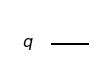

In [6]:
# draw the left side of the above equation
c = QuantumCircuit(1)

# c.x(0)
# c.x(0)

c.draw(output="mpl")

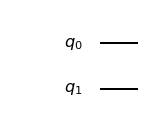

In [9]:
# draw the left side of the above equation
c = QuantumCircuit(2)

# c.x(0)
# c.cx(0,1)
# c.x(0)

c.draw(output="mpl")

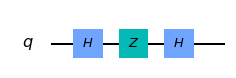

In [11]:
# X = HZH
c = QuantumCircuit(1)

# c.x(0)
c.h(0)
c.z(0)
c.h(0)

c.draw(output="mpl")

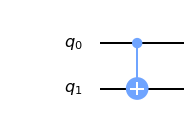

In [15]:
# C_X = H C_Z H
c = QuantumCircuit(2)

c.cx(0,1)
# c.h(1)
# c.cz(0,1)
# c.h(1)

c.draw(output="mpl")

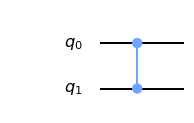

In [4]:
# C_X_1,0 --> C_X_0,1
c = QuantumCircuit(2)

# first circuit
#c.h(0)
#c.h(1)
#c.cx(0,1)
#c.h(1)
#c.h(0)

# second circuit
#c.h(0)
c.cz(0,1)
#c.h(0)

# third circuit
# c.cx(1,0)

c.draw(output="mpl")

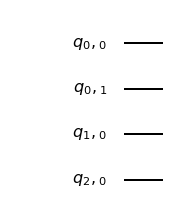

In [11]:
# C^3
zero = QuantumRegister(2, "q_0,")
one  = QuantumRegister(1, "q_1,")
two  = QuantumRegister(1, "q_2,")
c = QuantumCircuit(zero, one, two)

c.draw(output="mpl")

In [8]:
# taken from https://github.com/dor2727/manim/blob/my_project/my_project/qubit_utils.py#LC158

class RotationMatrix(object):
	def __init__(self, matrix, automatic_decomposition=True):
		if matrix.shape != (2,2):
			raise ValueError("the input has to be a 2x2 np.ndarray")

		self.matrix = matrix

		# I don't really like operating on objects inside __init__
		# however, since the whole purpose of this object is to expose properties of the matrix
		# And since I've tested the common cases
		# I decided that it would be better (for syntactic reasons) to decompose the matrix inside __init__
		if automatic_decomposition:
			self.decompose()
			self.axis = self._get_rotation_axis()
			self.theta = self._get_rotation_amount()
			self.theta_deg = self.theta * DEGREES

	def decompose(self):
		"""
		assuming a matrix of the form: [ a , b ]
									   [ c , d ]
		we decompose into
		alpha*I + beta*X + gamma*Y + delta*Z
		"""
		a,b,c,d = self.matrix.flatten()
		self.alpha = (a + d)/2
		self.delta = (a - d)/2
		self.beta  = (b + c)/2
		self.gamma = (c - b)/2j

	# this other decomposition method is actually not used, but it stays here because
	# 1) its always nice to see other decomposition methods
	# 2) maybe one day it will become useful
	@staticmethod
	def _HS(M1, M2):
		"""Hilbert-Schmidt-Product of two matrices M1, M2"""
		return (np.dot(M1.conjugate().transpose(), M2)).trace()

	def _decompose2(self):
		self.alpha = self._HS(m,I) / 2
		self.beta  = self._HS(m,X) / 2
		self.gamma = self._HS(m,Y) / 2
		self.delta = self._HS(m,Z) / 2


	def _get_rotation_axis(self):
		n = np.linalg.norm([
			self.beta,
			self.gamma,
			self.delta
		])

		return np.array([
			abs(self.beta ) / n,
			abs(self.gamma) / n,
			abs(self.delta) / n,
		])

	def _get_rotation_amount(self):
		"""
		a general rotation matrix, rotation theta radians, in the direction of n_hat, can be written as:
		cos(theta/2) I - i sin(theta/2) n_hat dot sigma_vector
		Thus, we take alpha (the coefficient for I).
		Then we take its absolute value, to remove any absolute phase
		And then we take inverse-cosine, and multiply by 2
		"""
		theta = np.arccos(abs(self.alpha))*2
		if self.alpha.imag < 0:
			theta = TAU - theta
		return theta

PI = np.pi
TAU = 2 * PI
DEGREES = TAU / 360

In [9]:
Hadamard_Y_Z = 1/np.sqrt(2) * np.array([[1 ,-1j], [1j,-1 ]])
rm = RotationMatrix(Hadamard_Y_Z)
print(rm._get_rotation_axis())
print(rm._get_rotation_amount())

[0.         0.70710678 0.70710678]
3.141592653589793
